### Introduction
This notebook was finished by refering [Pytanic](https://www.kaggle.com/johnnycchuang/pytanic) kernel that covers the topics we need to learn including:
- Exploratory Data Analysis
- Data Visualization
- Data Preprocessing
- Feature Engineering
- Modelling
- Stack and Ensemble methods



### Load Python Modules

** Panda **
It is well suited for many different kinds of data
- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

** NumPy **
It is the fundamental package for scientific computing with Python. It contains among other things:
- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

** SciPy **
SciPy (pronounced "Sigh Pie") is a Python-based ecosystem of open-source software for mathematics, science, and engineering.

** sklearn **
Short for scikit-learn. It features various classification, regression and clustering algorithms including **support vector machines**, **random forests**, **gradient boosting**, **k-means** and **DBSCAN**,etc and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

** Seaborn **
Seaborn is a Python visualization library based on matplotlib.
It provides a high-level interface for drawing attractive statistical graphics.

** XGBoost **
It is short for "Extreme Gradient Boosting" and used for supervised learning problems, where we use the training data (with multiple features). However, this module will be removed in 0.20. Using it will get DeprecationWarning.


In [1]:
"""
%matplotlib inline : displays the plots INSIDE the notebook
plt.show() : displays the plots OUTSIDE of the notebook
%matplotlib inline will OVERRIDE plt.show() in the sense that plots will be shown IN the notebook even when plt.show() is called
"""
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from scipy import stats

import itertools         # Functions creating iterators for efficient looping
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec

import sklearn as sk
from sklearn import svm
from sklearn import tree 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import xgboost as xgb


/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Load Data and Overivew Data
Total 1309 records. train.csv and test.cvs contain 891 records and 418 records, respectively.

In [2]:
sns.set(style='white', context='notebook', palette='deep')

train = pd.read_csv("./dataset/titanic_train.csv")
test = pd.read_csv("./dataset/titanic_test.csv")
combine = pd.concat([train.drop('Survived', 1), test])


First a broad overview. What are the types of data and their typical shape and content?

In [3]:
train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In summary we have 1 floating point feature (Fare), 1 integer variable (Age), 3 ordinal integer features (Plcass, SibSp, Parch), 2 categorical text features (Sex, Embarked), and 3 text string features (Ticket, Cabin, Name).


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



### To know the missing data

In [5]:
print(train.isnull().sum())
print(test.info())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In the **training data**, miss **687 Cabin** numbers, **177 Age** values, and **2 Embarked** values.<br>
In the **test data**, there is **one Fare** missing, **86 Age** values are unknown, and only 91 Cabin numbers were preserved (missing **327 Cabin** numbers). Best to keep that in mind.

### Exploration Data Analysis


In [6]:
surv = train[train['Survived']==1]
nosurv = train[train['Survived']==0]
surv_col = "blue"
nosurv_col = "red"

print("Survived: %i (%.1f percent), Not Survived: %i (%.1f percent), Total: %i"\
        %(len(surv), 1.*len(surv)/len(train)*100.0,\
          len(nosurv), 1.*len(nosurv)/len(train)*100.0, len(train)))

Survived: 342 (38.4 percent), Not Survived: 549 (61.6 percent), Total: 891


Median age survivors: 28.0, Median age non-survivor: 28.0


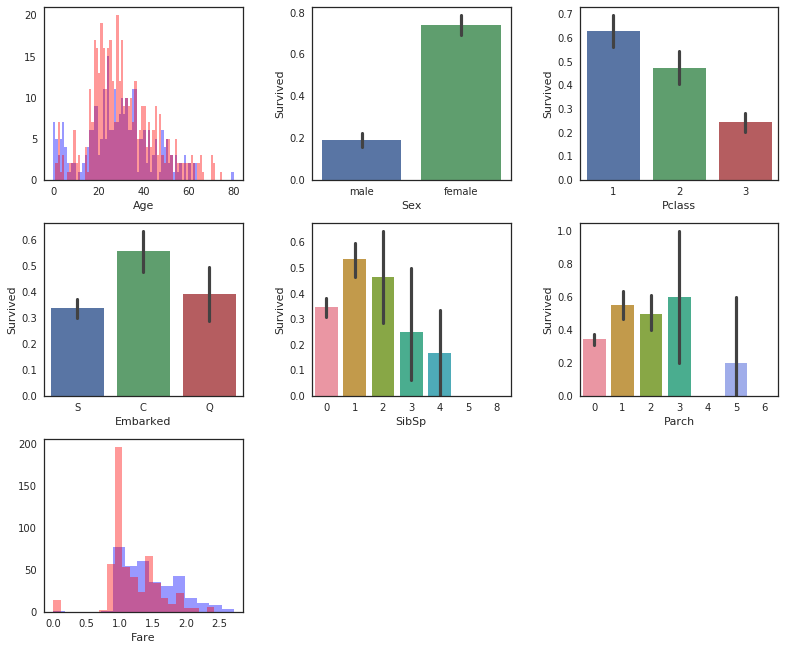

In [7]:
plt.figure(figsize=[12,10])
plt.subplot(331)
sns.distplot(surv['Age'].dropna().values, bins=range(0,81,1), kde=False, color=surv_col)
sns.distplot(nosurv['Age'].dropna().values, bins=range(0,81,1), kde=False, color=nosurv_col, axlabel='Age')
plt.subplot(332)
sns.barplot('Sex', 'Survived', data=train)
plt.subplot(333)
sns.barplot('Pclass', 'Survived', data=train)
plt.subplot(334)
sns.barplot('Embarked', 'Survived', data=train)
plt.subplot(335)
sns.barplot('SibSp', 'Survived', data=train)
plt.subplot(336)
sns.barplot('Parch', 'Survived', data=train)
plt.subplot(337)
sns.distplot(np.log10(surv['Fare'].dropna().values+1), kde=False, color=surv_col)
sns.distplot(np.log10(nosurv['Fare'].dropna().values+1), kde=False, color=nosurv_col, axlabel='Fare')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

print("Median age survivors: %.1f, Median age non-survivor: %.1f"\
        %(np.median(surv['Age'].dropna()), np.median(nosurv['Age'].dropna())))


**Age**: The medians are identical. However, it's noticeable that fewer young adults have survived (ages 18 - 30-ish) whereas children younger than 10-ish had a better survival rate. Also, there are no obvious outliers that would indicate problematic input data. The highest ages are well consistent with the overall distribution. There is a notable shortage of teenagers compared to the crowd of younger kids. But this could have natural reasons.<br>
**Pclass**: There's a clear trend that being a 1st class passenger gives you better chances of survival. Life just isn't fair.<br>
**SibSp & Parch**: Having 1-3 siblings/spouses/parents/children on board (SibSp = 1-2, Parch = 1-3) suggests proportionally better survival numbers than being alone (SibSp + Parch = 0) or having a large family travelling with you.<br>
**Embarked**: Well, that does look more interesting than expected. Embarking at "C" resulted in a higher survival rate than embarking at "S". There might be a correlation with other variables, here though.<br>
**Fare**: This is case where a linear scaling isn't of much help because there is a smaller number of more extreme numbers. A natural choice in this case is to transform the values logarithmically. For this to work we need to adjust for the zero-fare entries. The plot tells us that the survival chances were much lower for the cheaper cabins. Naively, one would assume that those cheap cabins were mostly located deeper inside the ship, i.e. further away from the life boats.<br>

Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


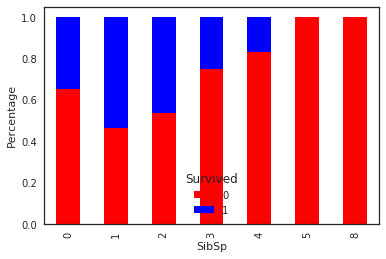

In [8]:
tab = pd.crosstab(train['SibSp'], train['Survived'])
print(tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, color=[nosurv_col, surv_col])
plt.xlabel('SibSp')
plt.ylabel('Percentage')


Random outcomes with 2 possibilities (like heads or tails when flipping a coin) follow the **binomial distribution**. We can use a binomial test to estimate the probability that 5 non-survivors out of a total 5 passengers with SibSp = 5 happened due to chance assuming the overall 38% survival chance for the entire sample.
[Johnny: over my head]

In [9]:
print(stats.binom_test(x=5, n=5, p=0.62))

0.164176016


Anything above 0.05 is usually not significant and therefore solely based on these numbers we cannot say whether the SibSp = 5 sample behaves different than the rest.[Johnny: Why?]<br>
In summary, parch >= 4 and sibsp >= 3 is bad. So is **parch + sibsp = 0** (i.e. both 0). **Parch in 1-3** and **Sibsp in 1-2** is **good**

### Cabin Numbers

Recap:
- In the training data, miss 687 Cabin numbers. (687/891 = 77.1% missing, 22.9% known)
- In the test data, miss 327 Cabin numbers. (327/418 = 78.2% missing, 21.8% known)

In [10]:
print("We know %i of %i Cabin numbers in the training data set and" % (len(train['Cabin'].dropna()), len(train)))
print("we know %i of %i Cabin numbers in the testing data set." % (len(test['Cabin'].dropna()), len(test)))
print(train.loc[:, ['Survived', 'Cabin']].dropna().head(8))


We know 204 of 891 Cabin numbers in the training data set and
we know 91 of 418 Cabin numbers in the testing data set.
    Survived        Cabin
1          1          C85
3          1         C123
6          0          E46
10         1           G6
11         1         C103
21         1          D56
23         1           A6
27         0  C23 C25 C27


Suppose one could take the starting letters, which might indicate **specific decks** on the ship, and use them as an additional classifier. But for less than 25% of cabins known this might not be very useful. One should assume that it's more likely to know someone's cabin number if they survived.

### Ticket Numbers


In [11]:
print("There are %i unique ticket numbers among the %i tickets." %\
      (train['Ticket'].nunique(), train['Ticket'].count()))
print("-----------------------------------------------------")

train_tkgrouped = train.groupby('Ticket')
k = 0
for name, group in train_tkgrouped:
  if (len(group) > 1):
    print(group.loc[:, ['Survived', 'Name', 'Fare']])
    print("-----------------------------------------------------")
    k += 1
  if (k>10):
    break

There are 681 unique ticket numbers among the 891 tickets.
-----------------------------------------------------
     Survived                                               Name  Fare
257         1                               Cherry, Miss. Gladys  86.5
504         1                              Maioni, Miss. Roberta  86.5
759         1  Rothes, the Countess. of (Lucy Noel Martha Dye...  86.5
-----------------------------------------------------
     Survived                                    Name   Fare
262         0                       Taussig, Mr. Emil  79.65
558         1  Taussig, Mrs. Emil (Tillie Mandelbaum)  79.65
585         1                     Taussig, Miss. Ruth  79.65
-----------------------------------------------------
     Survived                            Name  Fare
110         0  Porter, Mr. Walter Chamberlain  52.0
475         0     Clifford, Mr. George Quincy  52.0
-----------------------------------------------------
     Survived                            

Sharing a ticket number is not uncommon. We dare to put forth this conjecture: **if your group (mostly family) survived then you survived as well, unless you were a man (and presumably helped your wife/daughter/lady friend)**.
<br>
However,
- Common last names might not be unique in the passenger list
- A ticket is not always shared by people with a common name. Therefore, a shared ticket might actually be a stronger predictor.
- Fare was identical for all the passengers in each ticket group.

### Relations between features

**Features heatmap**

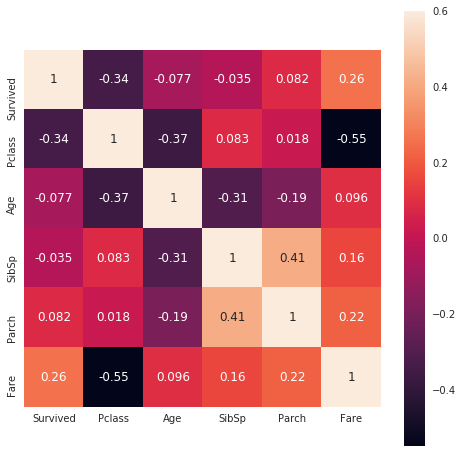

In [12]:
plt.figure(figsize=(8,8))
foo = sns.heatmap(train.drop('PassengerId', axis=1).corr(), vmax=0.6, square=True, annot=True)
#Note: axis=1 denotes that we are referring to a column, not a row


Summray:
- Pclass is somewhat correlated with Fare (1st class tickets would be more expensive than 3rd class ones)
- SibSp and Parch are weakly correlated (large families would have high values for both; solo travellers would have zero for both)
- Pclass already correlates with Survived in a noticeable way

** Features Pairplot **

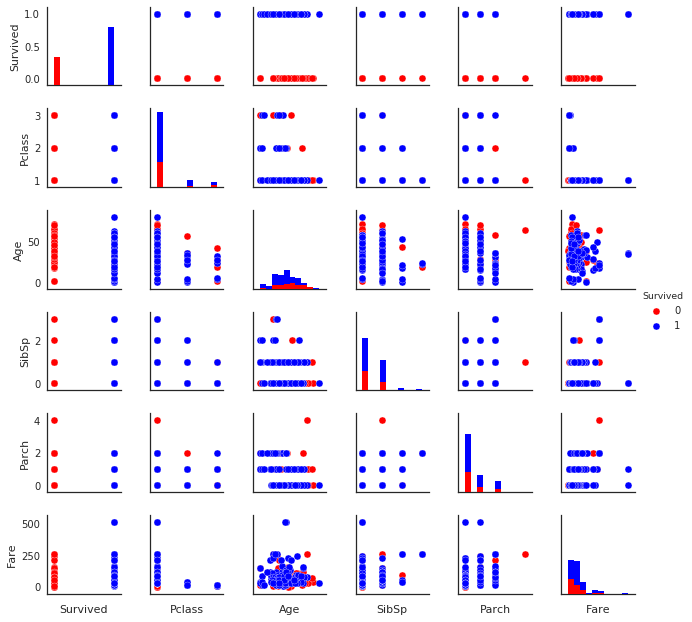

In [13]:
cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
g = sns.pairplot(data=train.dropna(), vars=cols, size=1.5, hue='Survived', palette=[nosurv_col, surv_col])
g.set(xticklabels=[])


To start with the strong signals in the correlation plot and to examine them more in detail

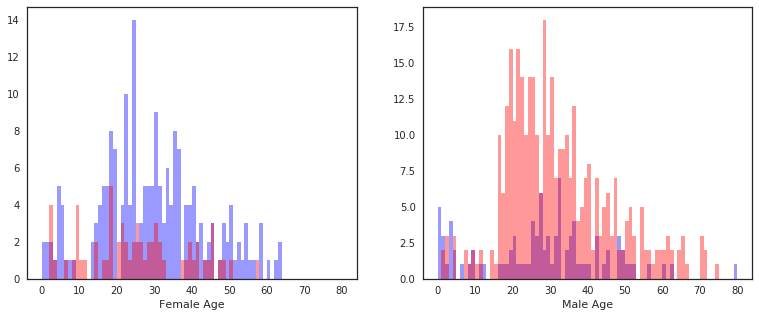

In [14]:
msurv = train[(train['Survived']==1) & (train['Sex']=='male')]
fsurv = train[(train['Survived']==1) & (train['Sex']=='female')]
mnosurv = train[(train['Survived']==0) & (train['Sex']=='male')]
fnosurv = train[(train['Survived']==0) & (train['Sex']=='female')]

plt.figure(figsize=[13,5])
plt.subplot(121)
sns.distplot(fsurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_col)
sns.distplot(fnosurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_col, axlabel='Female Age')
plt.subplot(122)
sns.distplot(msurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_col)
sns.distplot(mnosurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_col, axlabel='Male Age')


- For females the survival chances appear to be higher between 18 and 40, whereas for men in that age range the odds are flipped. This difference between 18-40 yr olds might be a better feature than Sex and Age by themselves.
- Boys have proportional better survival chances than men, whereas girls have similar chances as women have. Rather small numbers, though.<br>
<br>
Using a **violin plot** to study the correlation of Age with Pclass.

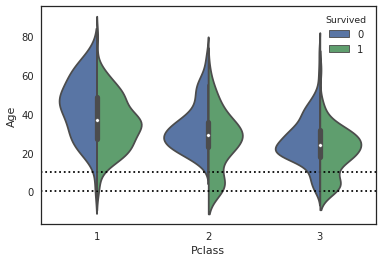

In [15]:
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True)
plt.hlines([0,10], xmin=-1, xmax=3, linestyles="dotted")


- Age decreases progressively as Pclass decreases from 1st to 3rd
- Most older passengers are 1st class, but very few children are. This conflates the impact of Age and Pclass on the survival chances.
- In 1st class, younger adults had better survival chances than older ones.
- Most children in 2nd class survived, and the majority in 3rd class did too.<br>
<br>
Using **mosaic plot** and **factorplot** to view Pclass vs Sex with a 2-dimensional overview.

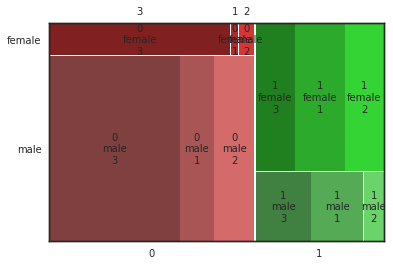

In [16]:
dummy = mosaic(train, ["Survived", "Sex", "Pclass"])


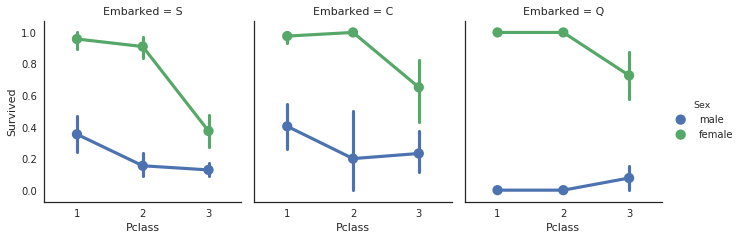

In [17]:
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", col="Embarked",
                   data=train, aspect=0.9, size=3.5, ci=95.0)


Both the factorplot and the mosaicplot indicate that **almost all females that died were 3rd class passengers**.
For **males being in 1st class gives a survival boost**, otherwise the proportions look roughly similar.
Except for 3rd class, **the survival for Embarked == Q is close to 100% split between male and female**.<br>
<br>
The numbers for Pclass vs Embarked with a pandas crosstab plot:

Pclass      1    2    3
Embarked               
C         141   28  101
Q           3    7  113
S         177  242  495


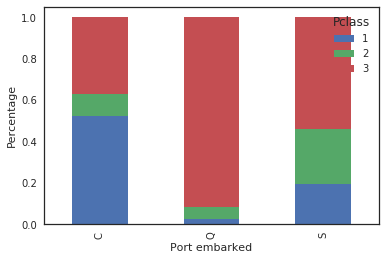

In [18]:
tab = pd.crosstab(combine['Embarked'], combine['Pclass'])
print(tab)
dummp = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummp = plt.xlabel('Port embarked')
dummp = plt.ylabel('Percentage')


- a high percentage of those embarked at "C" were 1st class passengers.
- almost everyone who embarked at "Q" went to 3rd class (this means that the clear separation in the factorplot for "Q" isn't very meaningful, unfortunately).<br>
<br>
It seems that embarking at "Q" improved your chances for survival if you were a 3rd class passenger.

Sex       female  male
Embarked              
C            113   157
Q             60    63
S            291   623
Sex     female  male
Pclass              
1          144   179
2          106   171
3          216   493
Sex    female  male
SibSp              
0         174   434
1         106   103
2          13    15
3          11     5
4           6    12
5           1     4
8           3     4
Sex    female  male
Parch              
0         194   484
1          60    58
2          49    31
3           4     1
4           2     2
5           4     1
6           1     0


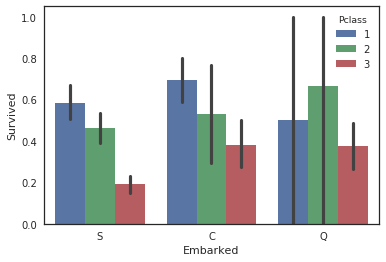

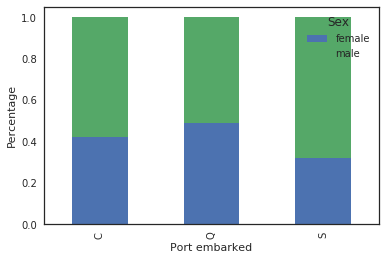

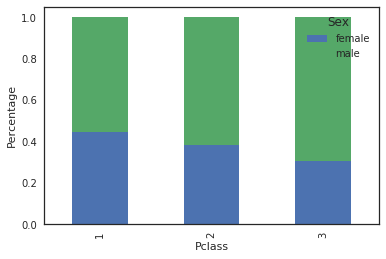

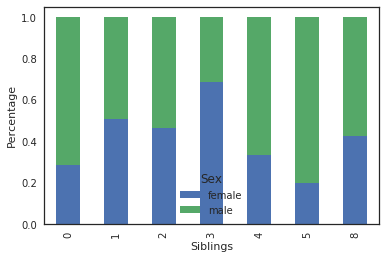

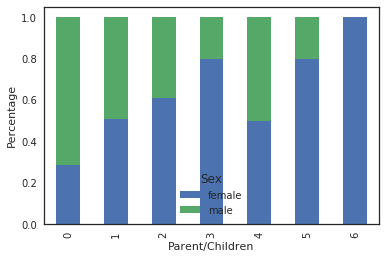

In [19]:
sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=train)

tab = pd.crosstab(combine['Embarked'], combine['Sex'])
print(tab)
dummpy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummpy = plt.xlabel('Port embarked')
dummpy = plt.ylabel('Percentage')

tab = pd.crosstab(combine['Pclass'], combine['Sex'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummpy = plt.xlabel('Pclass')
dummpy = plt.ylabel('Percentage')

sib = pd.crosstab(train['SibSp'], train['Sex'])
print(sib)
dummy = sib.div(sib.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Siblings')
dummy = plt.ylabel('Percentage')

parch = pd.crosstab(train['Parch'], train['Sex'])
print(parch)
dummy = parch.div(parch.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Parent/Children')
dummy = plt.ylabel('Percentage')


- Different percentages of passenger classes and sexes have embarked from different ports, which is reflected in the lower survival rates for "S" (more men, fewer 1st class) compared to "C" (more women and 1st class).
- It's hard to say at this stage whether there is any real impact left for the Embarked feature once we correct for these connections.<br>
<br>
Check Age and Embarked:

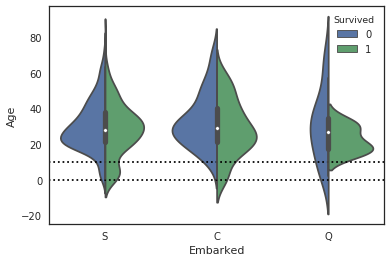

In [20]:
sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train, split=True)
plt.hlines([0,10], xmin=-1, xmax=3, linestyles="dotted")


There don't seem to be strong differences in Age among the Embarked categories that would point at an imbalance that goes beyond the influence of Pclass and Sex.<br>
<br>
Study the relation between Fare and Pclass:

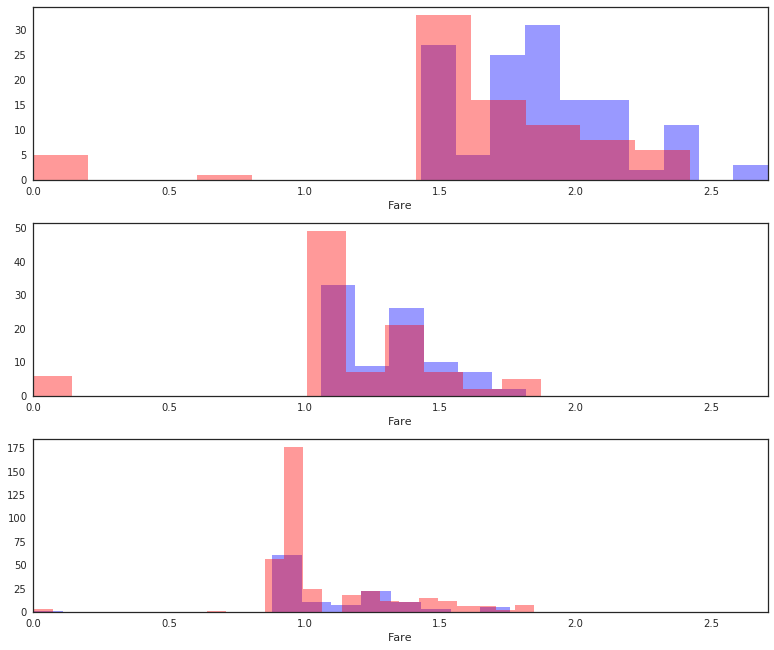

In [21]:
warnings.filterwarnings("ignore")

plt.figure(figsize=[12,10])
plt.subplot(311)
ax1 = sns.distplot(np.log10(surv['Fare'][surv['Pclass']==1].dropna().values+1), kde=False, color=surv_col)
ax1 = sns.distplot(np.log10(nosurv['Fare'][nosurv['Pclass']==1].dropna().values+1), kde=False, color=nosurv_col, axlabel='Fare')
ax1.set_xlim(0,np.max(np.log10(train['Fare'].dropna().values)))
plt.subplot(312)
ax2 = sns.distplot(np.log10(surv['Fare'][surv['Pclass']==2].dropna().values+1), kde=False, color=surv_col)
ax2 = sns.distplot(np.log10(nosurv['Fare'][nosurv['Pclass']==2].dropna().values+1), kde=False, color=nosurv_col, axlabel='Fare')
ax2.set_xlim(0,np.max(np.log10(train['Fare'].dropna().values)))
plt.subplot(313)
ax3 = sns.distplot(np.log10(surv['Fare'][surv['Pclass']==3].dropna().values+1), kde=False, color=surv_col)
ax3 = sns.distplot(np.log10(nosurv['Fare'][nosurv['Pclass']==3].dropna().values+1), kde=False, color=nosurv_col, axlabel='Fare')
ax3.set_xlim(0,np.max(np.log10(train['Fare'].dropna().values)))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)


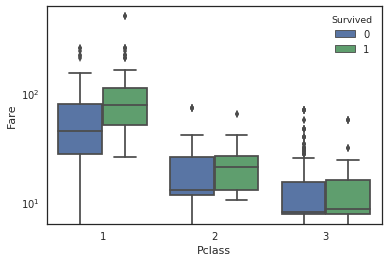

In [22]:
ax = sns.boxplot(x="Pclass", y="Fare", hue="Survived", data=train);
ax.set_yscale('log')


- There is a broad distribution between the 1st class passenger fares (rich -> super rich)
- There's an interesting bimodality in the 2nd class cabins and a long tail in the 3rd class ones.
- For each class there is strong evidence that the cheaper cabins were worse for survival. A similar effect can be seen in a boxplot.<br>

### Filling in missing Embarked and Fare values
Recap:<br>
- In the training data, miss 687 Cabin numbers, 177 Age values, and **2 Embarked values**.
- In the test data, there is **one Fare missing**, 86 Age values are unknown, and only 91 Cabin numbers were preserved (missing 327 Cabin numbers).<br>
<br>
Let's find these two passengers:

In [23]:
print(train[train['Embarked'].isnull()])


     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


These are two women that **travelled together in 1st class, were 38 and 62 years old, and had no family on board**.

In [24]:
print(combine.where((combine['Embarked']!='Q') & (combine['Pclass']<1.5) &\
                    (combine['Sex']=='female')).groupby(['Embarked', 'Pclass', 'Sex', 'Parch', 'SibSp']).size())


Embarked  Pclass  Sex     Parch  SibSp
C         1.0     female  0.0    0.0      30
                                 1.0      20
                          1.0    0.0      10
                                 1.0       6
                          2.0    0.0       2
                                 2.0       2
                          3.0    1.0       1
S         1.0     female  0.0    0.0      20
                                 1.0      20
                                 2.0       3
                          1.0    0.0       7
                                 1.0       6
                          2.0    0.0       4
                                 1.0       5
                                 3.0       3
                          4.0    1.0       1
dtype: int64


These are quite a few grouping levels, but **30 ("C") vs 20 ("S")** are numbers that are still large enough to be useful in this context. In addition, already a grouping without the Parch and SibSp features suggests similar numbers for women in 1st class embarking from **"C" (71) vs "S" (69)** (in contrast to the larger overall number of all 1st class passengers leaving from "S").<br>
So, **predicting Embarked == "C"** for these two passengers is more reasonable than predicting "S".


In [25]:
train['Embarked'].iloc[61] = "C"
train['Embarked'].iloc[829] = "C"


Let's see the only one Fare missing in the test data

In [26]:
print(test[test['Fare'].isnull()])

     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S  


A 60-yr old 3rd class passenger without family on board. We will base our *Fare* prediction on the median of the 3rd-class fares:

In [27]:
test['Fare'].iloc[152] = combine['Fare'][combine['Pclass']==3].dropna().median()
print(test['Fare'].iloc[152])


8.05


### Feature Engineering
<br>
List all devied features below and explain in detail later.

In [28]:
combine = pd.concat([train.drop('Survived', 1), test])
survived = train['Survived']

combine['Child'] = combine['Age'] <= 10
combine['Cabin_known'] = combine['Cabin'].isnull() == False
combine['Age_known'] = combine['Age'].isnull() == False
combine['Family'] = combine['SibSp'] + combine['Parch']
combine['Alone'] = combine['Family'] == 0
combine['Large_Family'] = (combine['SibSp']>2) | (combine['Parch']>3)
combine['Deck'] = combine['Cabin'].str[0]
combine['Deck'] = combine['Deck'].fillna(value='U')
combine['Ttype'] = combine['Ticket'].str[0]
combine['Title'] = combine['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
combine['Fare_cat'] = pd.DataFrame(np.floor(np.log10(combine['Fare']+1))).astype('int')
combine['Bad_ticket'] = combine['Ttype'].isin(['3','4','5','6','7','8','A','L','W'])
# Johnny, should add (combine['Age']>=10)
combine['Young'] = (combine['Age']<=30) | (combine['Title'].isin(['Master','Miss','Mlle']))
combine['Shared_ticket'] = np.where(combine.groupby('Ticket')['Name'].transform('count')>1, 1, 0)
combine['Ticket_group'] = combine.groupby('Ticket')['Name'].transform('count')
combine['Fare_eff'] = combine['Fare'] / combine['Ticket_group']
combine['Fare_eff_cat'] = np.where(combine['Fare_eff']>16.0, 2, 1)
combine['Fare_eff_cat'] = np.where(combine['Fare_eff']<8.5, 0, combine['Fare_eff_cat'])
test = combine.iloc[len(train):]
train = combine.iloc[:len(train)]
train['Survived'] = survived

surv = train[train['Survived']==1]
nosurv = train[train['Survived']==0]


** *Child* **

Pclass    1    2    3
Child                
False   213  167  447
True      3   17   44
Sex    female  male
Child              
False     283   544
True       31    33


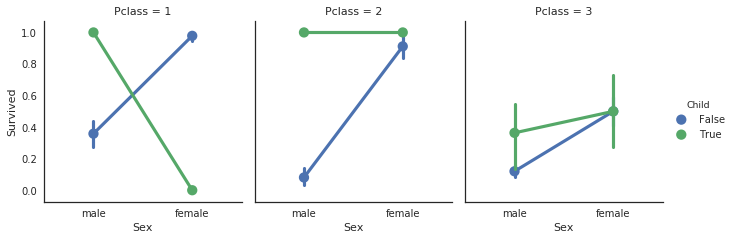

In [29]:
g = sns.factorplot(x="Sex", y="Survived", hue="Child", col="Pclass", data=train, aspect=0.9, size=3.5, ci=95.0)
tab = pd.crosstab(train['Child'], train['Pclass'])
print(tab)
tab = pd.crosstab(train['Child'], train['Sex'])
print(tab)


Male children appear to have a survival advantage in 2nd and 3rd class. We should include the Child feature in our model testing.<br>
<br>
***Cabin_known***

Survived       0    1
Cabin_known          
False        481  206
True          68  136


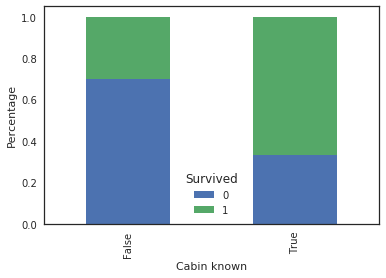

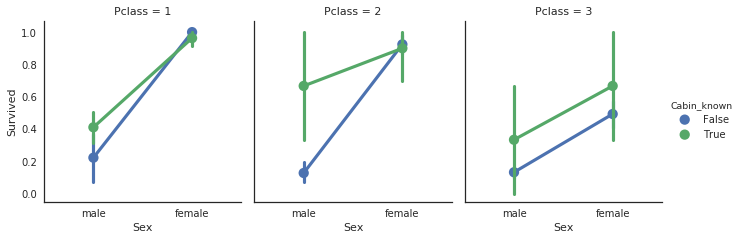

In [30]:
cab = pd.crosstab(train['Cabin_known'], train['Survived'])
print(cab)
dummy = cab.div(cab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Cabin known')
dummy = plt.ylabel('Percentage')
g = sns.factorplot(x="Sex", y="Survived", hue="Cabin_known", col="Pclass", data=train, aspect=0.9, size=3.5, ci=95.0)


There remains a potential trend for males and for 3rd class passengers but the uncertainties are large. This feature should be tested in the modelling stage.<br>
<br>
***Deck***

Survived    0    1
Deck              
A           8    7
B          12   35
C          24   35
D           8   25
E           8   24
F           5    8
G           2    2
T           1    0
U         481  206


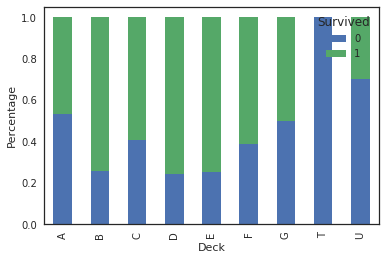

In [31]:
tab = pd.crosstab(train['Deck'], train['Survived'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Deck')
dummy = plt.ylabel('Percentage')


The best decks for survival were B, D, and E with about 66% chance. C and F are around 60%. A and G at 50%. The only passenger on deck T died, but that's hardly robust statistics.<br>
<br>
he largest number of cases we have is for B vs C. Let's see whether that's significant:

In [32]:
stats.binom_test(x=12,n=12+35, p=24/(24.+35.))


0.037415527401218264

Just about formally significant (i.e. < 5%).[Johnny: over my head] It might be worth our while to include this feature in at least the initial stages of modelling to see how it performs.

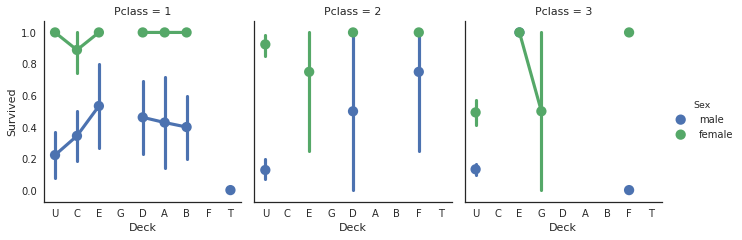

In [33]:
g = sns.factorplot(x="Deck", y="Survived", hue="Sex", col="Pclass", data=train, aspect=0.9, size=3.5, ci=95.0)


**Ttype and Bad_ticket**<br>
<br>
Ttype is the type of a ticket through **the first digit** of the ticket number.

In [34]:
print(train['Ttype'].unique())
print(test['Ttype'].unique())


['A' 'P' 'S' '1' '3' '2' 'C' '7' 'W' '4' 'F' 'L' '9' '6' '5' '8']
['3' '2' '7' 'A' '6' 'W' 'S' 'P' 'C' '1' 'F' '4' '9' 'L']


Survived    0   1
Ttype            
1          54  92
2          98  85
3         229  72
4           8   2
5           3   0
6           5   1
7           8   1
8           2   0
9           0   1
A          27   2
C          31  16
F           3   4
L           3   1
P          23  42
S          44  21
W          11   2


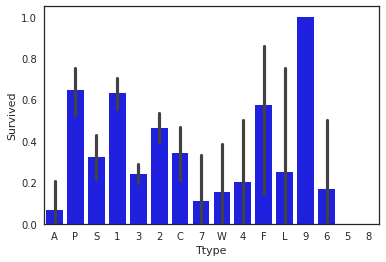

In [35]:
tab = pd.crosstab(train['Ttype'], train['Survived'])
print(tab)
sns.barplot(x="Ttype", y="Survived", data=train, ci=95.0, color="blue")


Based on the above plot, we define a new feature called **Bad_ticket** under which we collect all the ticket numbers that start with digits which suggest less than 25% survival (e.g. 4, 5, or A).<br>
Of course, it's not the tickets themselves that are "bad" for survival, but the possibility that the ticket numbers might encode certain areas of the ship that would have led to higher or lower survival chances.

Survived      0    1
Bad_ticket          
False       253  261
True        296   81


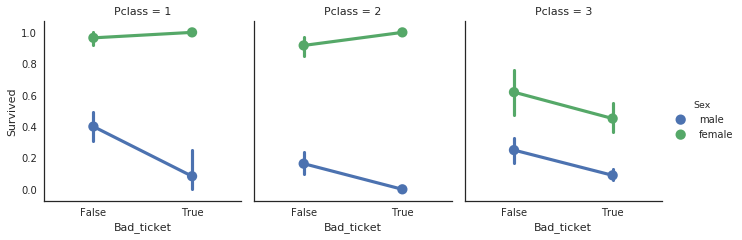

In [36]:
tab = pd.crosstab(train['Bad_ticket'], train['Survived'])
print(tab)
g = sns.factorplot(x="Bad_ticket", y="Survived", hue="Sex", col="Pclass", data=train, aspect=0.9, size=3.5, ci=95.0)


The factorplot suggests that bad tickets are worse for male passengers, and 3rd class passengers.

Bad_ticket  False  True 
Deck                    
A              14      1
B              44      3
C              56      3
D              24      9
E              27      5
F               9      4
G               2      2
T               1      0
U             337    350


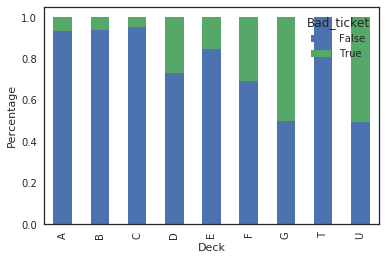

In [37]:
tab = pd.crosstab(train['Deck'], train['Bad_ticket'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Deck')
dummy = plt.ylabel('Percentage')


Bad_ticket might be a lower order effect that could give us some additional accuracy. We should test it out in the modelling stage.<br>
<br>
**Age_known**

Survived     0    1
Age_known          
False      125   52
True       424  290


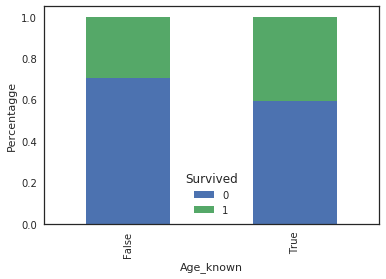

In [38]:
tab = pd.crosstab(train['Age_known'], train['Survived'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Age_known')
dummy = plt.ylabel('Percentagge')

There's a difference of about 30% vs 40% and it should be significant:

In [39]:
stats.binom_test(x=424, n=290+424, p=125/(125.+52.))

1.5623264542193693e-10

Very much so.[Johnny: over my head] However, we have seen before that there might be imbalances in the dominating features Sex and Plcass that create an apparent signal. Is this another of these cases?

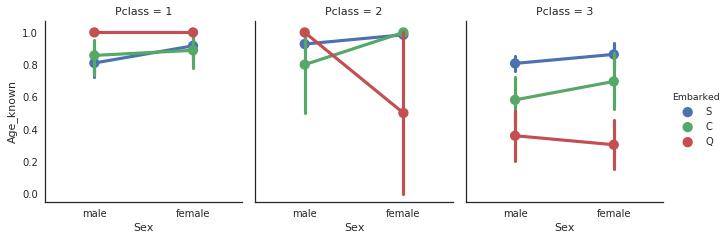

In [40]:
g = sns.factorplot(x="Sex", y="Age_known", hue="Embarked", col="Pclass", data=train, aspect=0.9, size=3.5, ci=95.0)


It actually is. Turns out that we are more likely to know the age of higher class passengers or women, which are the strongest survival predictors we have found, so far.<br>
There is a strong impact of Sex and Pclass on this new feature. This might be enough to explain all the variance in the Age_known variable.<br>
<br>
**Family**

Survived    0    1
Family            
0         374  163
1          72   89
2          43   59
3           8   21
4          12    3
5          19    3
6           8    4
7           6    0
10          7    0


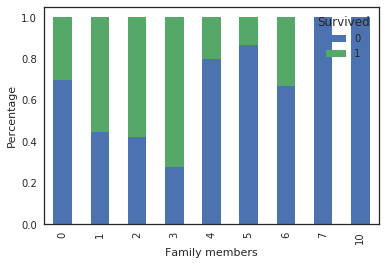

In [41]:
tab = pd.crosstab(train['Family'], train['Survived'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Family members')
dummy = plt.ylabel('Percentage')


We find that having 1-3 family members works best for survival. This feature is a mix of SibSp and Parch, which increases the overall numbers we can work with, but might smooth out some more subtle effects.<br>
<br>
**Alone**

Survived    0    1
Alone             
False     175  179
True      374  163


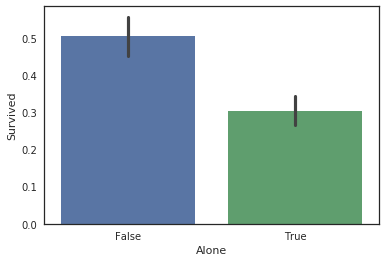

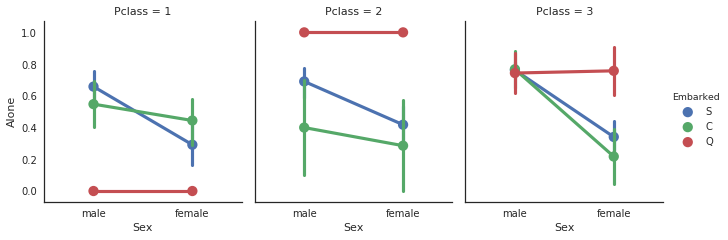

In [42]:
tab = pd.crosstab(train['Alone'], train['Survived'])
print(tab)
sns.barplot('Alone', 'Survived', data=train)
g = sns.factorplot(x="Sex", y="Alone", hue="Embarked", col="Pclass", data=train, aspect=0.9, size=3.5, ci=95.0)


Travelling alone appears bad enough to be significant. But more men were travelling alone than women did. Especially among the 3rd class passengers.<br>
<br>
**Large_Family**

Survived        0    1
Large_Family          
False         501  334
True           48    8


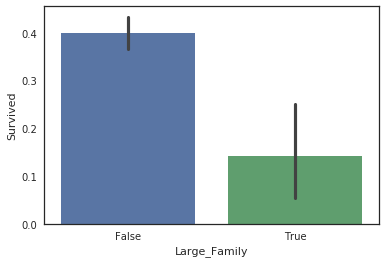

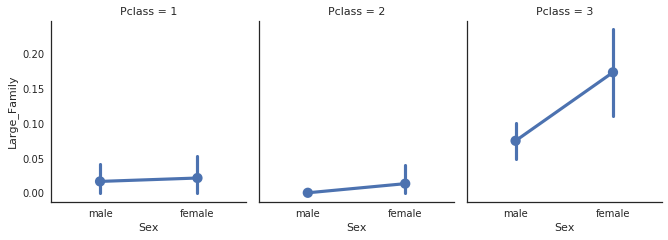

In [43]:
tab = pd.crosstab(train['Large_Family'], train['Survived'])
print(tab)
sns.barplot('Large_Family', 'Survived', data=train)
g = sns.factorplot(x="Sex", y="Large_Family", col="Pclass", data=train, aspect=0.9, size=3.5, ci=95.0)


Having a large family appears to be not good for survival. But most large families were travelling in 3rd class. The tentative imbalance between male and female 3rd class probably reflect the observation we made earlier that men were more likely to travel alone.<br>
<br>
**Shared_ticket**

Survived         0    1
Shared_ticket          
0              351  130
1              198  212
Sex            female  male
Shared_ticket              
0                 103   378
1                 211   199


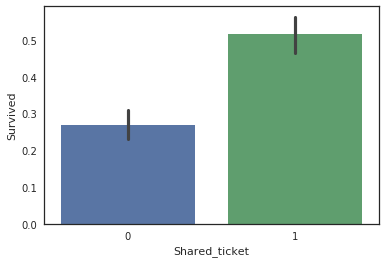

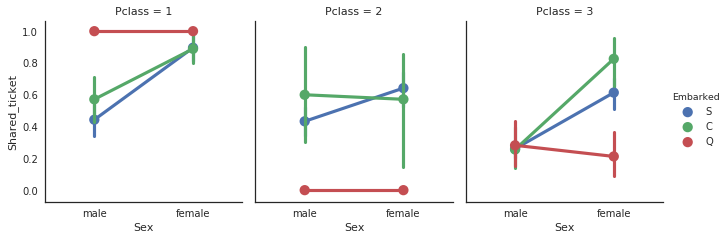

In [44]:
tab = pd.crosstab(train['Shared_ticket'], train['Survived'])
print(tab)
sns.barplot('Shared_ticket', 'Survived', data=train)
tab = pd.crosstab(train['Shared_ticket'], train['Sex'])
print(tab)
g = sns.factorplot(x="Sex", y="Shared_ticket", hue="Embarked", col="Pclass", data=train, aspect=0.9, size=3.5, ci=95.0)


Several of these derived parameters are strongly correlated with Sex and Pclass.<br>
Sharing a ticket appears to be good for survival. But again the sharing of tickets is more frequent with females and 1st class passengers. This is consistent with the other statistics that show that women were more likely to travel together with larger families.<br>
<br>
**Title**<br>
The titles in the passenger names can give us a way to estimate the missing age values.

In [45]:
print(combine['Age'].groupby(combine['Title']).count())
print(combine['Age'].groupby(combine['Title']).mean())
print("There are %i unique titles in total." % (len(combine['Title'].unique())))


Title
Capt              1
Col               4
Don               1
Dona              1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           53
Miss            210
Mlle              2
Mme               1
Mr              581
Mrs             170
Ms                1
Rev               8
Sir               1
the Countess      1
Name: Age, dtype: int64
Title
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64
There are 18 unique titles in total.


The dominating ones are Mr (581), Miss (210), Mrs (170), and Master (53); with the number referring to the combined data.<br>
Here are the age distributions for those:

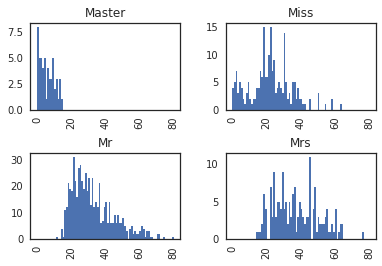

In [46]:
dummy = combine[combine['Title'].isin(['Mr', 'Miss', 'Mrs', 'Master'])]
foo = dummy['Age'].hist(by=dummy['Title'], bins=np.arange(0,81,1))


- Master is capturing the male children/teenagers very well
- Miss applies to girls as well as younger women up to about 40
- Mrs does not contain many teenagers, but has a sizeable overlap with Miss; especially in the range of 20-30 years old.<br>
<br>
By using 2 Age Groups, update to the Young variable we defined above. In order to address the issue of missing Age values by combining the Age and Title features into a single feature that should still contain some of the signal regarding survival.<br>
<br>
For this, we define everyone **under 30** or with a title of **Master, Miss, or Mlle** (Mademoiselle) as **Young**. All the other titles we group into Not Young. All the other rare titles (like Don or Lady) have average ages that are high enough to count as Not Young.

Survived    0    1
Young             
False     284  127
True      265  215


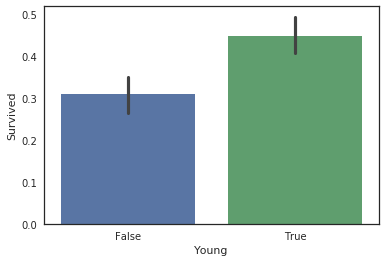

In [47]:
tab = pd.crosstab(train['Young'], train['Survived'])
print(tab)
sns.barplot('Young', 'Survived', data=train)


Pclass    1    2    3
Young                
False   135   78  198
True     81  106  293


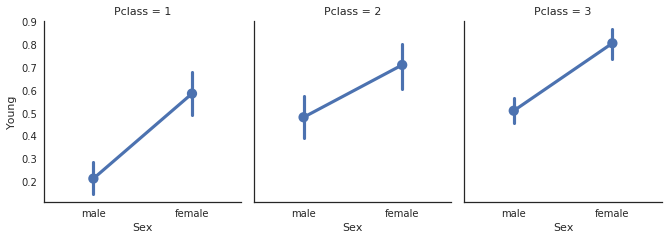

In [48]:
tab = pd.crosstab(train['Young'], train['Pclass'])
print(tab)
g = sns.factorplot(x="Sex", y="Young", col="Pclass", data=train, aspect=0.9, size=3.5, ci=95.0)


**Fare_cat**<br>
Let's recap the distribution of Fare with respect to Pclass. In order to simplify this broad distribution, we decide to classify the fares into 3 fare categories: 0-10, 10-100, and above 100. This transformation can be easily achieved using the base 10 logarithm:

In [49]:
print(pd.DataFrame(np.floor(np.log10(train['Fare']+1))).astype('int').head(5))


   Fare
0     0
1     1
2     0
3     1
4     0


So, we define a new feature, **Fare_cat**, as fare categories in the same way.

Survived    0    1
Fare_cat          
0         249   62
1         286  241
2          14   39


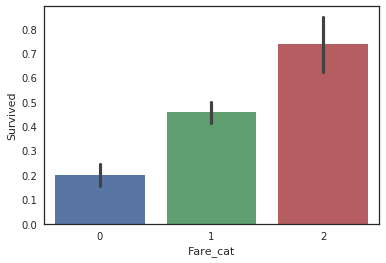

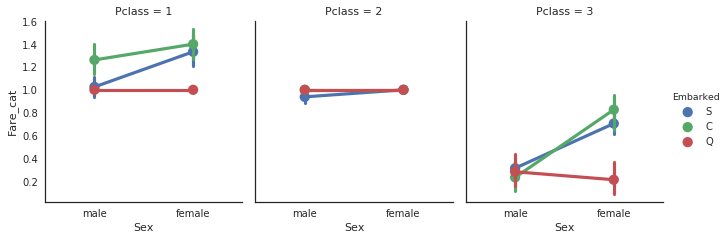

In [50]:
tab = pd.crosstab(train['Fare_cat'], train['Survived'])
print(tab)
sns.barplot('Fare_cat', 'Survived', data=train)
g = sns.factorplot(x="Sex", y="Fare_cat", hue="Embarked", col="Pclass", data=train, aspect=0.9, size=3.5, ci=95.0)


This might be related to the fact that women were more likely to share a cabin, and it would therefore indicate that the Fare might be a fare per cabin and not per passenger.<br>
<br>
**Fare_eff_cat**<br>
Let's investigate the Fare in more detail.<br>
First, we make sure that the passengers in each group really had the same Fare values:

2

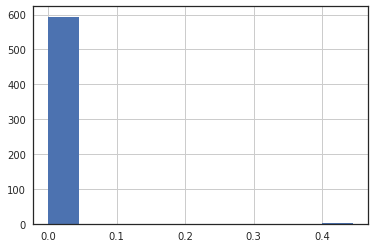

In [51]:
combine.groupby('Ticket')['Fare'].transform('std').hist()
np.sum(combine.groupby('Ticket')['Fare'].transform('std') > 0)


Only 2 values stand out.

In [52]:
combine.iloc[np.where(combine.groupby('Ticket')['Fare'].transform('std') > 0)]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Deck,Ttype,Title,Fare_cat,Bad_ticket,Young,Shared_ticket,Ticket_group,Fare_eff,Fare_eff_cat
138,139,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,...,U,7,Mr,1,True,True,1,2,4.60835,0
876,877,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,...,U,7,Mr,1,True,True,1,2,4.92290,0


It's Mr Osen and Mr Gustafsson on Ticket 7534. Their Fares are close enough, though, to include them in the general treatment.<br>
<br>
Now, let's think for a moment: Identical fares could mean that the fare for a cabin was shared equally among the passengers, in which case our previous treatment would have been justified. However, it could also mean that the listed value is **the cumulative fare per cabin** and it was simply recorded as the same value for each passenger. Intuitively, this doesn't seem so plausible, since you typically record what is paid for a ticket and not for a cabin. Let's check how it would transform the Fare distribution. For this, we create a **Fare_eff** feature above, which we derive by **dividing Fare by the number of people sharing a ticket** (Ticket_group; which we also newly created).

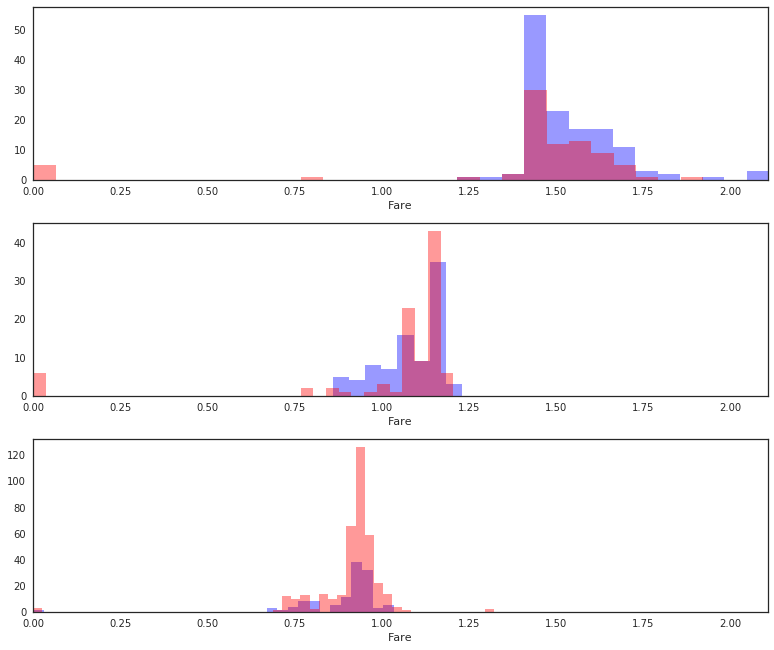

In [53]:
plt.figure(figsize=[12,10])
plt.subplot(311)
ax1 = sns.distplot(np.log10(surv['Fare_eff'][surv['Pclass']==1].dropna().values+1), kde=False, color=surv_col)
ax1 = sns.distplot(np.log10(nosurv['Fare_eff'][nosurv['Pclass']==1].dropna().values+1), kde=False, color=nosurv_col, axlabel='Fare')
ax1.set_xlim(0,np.max(np.log10(train['Fare_eff'].dropna().values)))
plt.subplot(312)
ax2 = sns.distplot(np.log10(surv['Fare_eff'][surv['Pclass']==2].dropna().values+1), kde=False, color=surv_col)
ax2 = sns.distplot(np.log10(nosurv['Fare_eff'][nosurv['Pclass']==2].dropna().values+1), kde=False, color=nosurv_col, axlabel='Fare')
ax2.set_xlim(0,np.max(np.log10(train['Fare_eff'].dropna().values)))
plt.subplot(313)
ax3 = sns.distplot(np.log10(surv['Fare_eff'][surv['Pclass']==3].dropna().values+1), kde=False, color=surv_col)
ax3 = sns.distplot(np.log10(nosurv['Fare_eff'][nosurv['Pclass']==3].dropna().values+1), kde=False, color=nosurv_col, axlabel='Fare')
ax3.set_xlim(0,np.max(np.log10(train['Fare_eff'].dropna().values)))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)


We see that the distributions become significantly narrower and that the tails and bimodality become much weaker. The really expensive Fares in Pclass == 1 are pretty much all gone.<br>
Here's how the standard deviations compare:

In [54]:
print(combine[combine['Fare']>1].groupby('Pclass')['Fare'].std())
print(combine[combine['Fare_eff']>1].groupby('Pclass')['Fare_eff'].std())


Pclass
1    80.259713
2    13.382064
3    11.476600
Name: Fare, dtype: float64
Pclass
1    14.675124
2     2.031927
3     1.366691
Name: Fare_eff, dtype: float64


More importantly, there is a reasonable argument to be made for this new Fare_eff feature to represent the actual fare better than the original feature. For once, it splits much cleaner between the Pclasses:

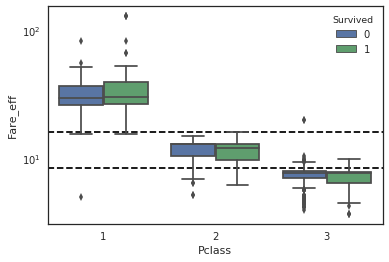

In [55]:
ax = sns.boxplot(x="Pclass", y="Fare_eff", hue="Survived", data=train)
ax.set_yscale('log')
ax.hlines([8.5,16], -1, 4, linestyles='dashed')


So well, in fact that defining new fare categories seems almost redundant because **Pclass already captures most of this signal**. We use the dashed lines in the plot above for an division into 3 classes, which separate the cheaper Fare_eff of a Pclass group from the more expensive ones of the next one. The new feature is called **Fare_eff_cat** and behaves as follows:

Survived        0    1
Fare_eff_cat          
0             346  120
1             128   87
2              75  135


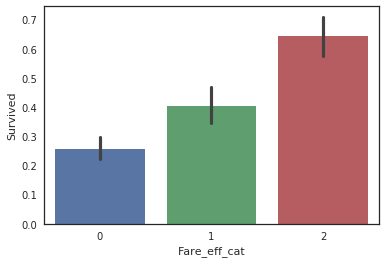

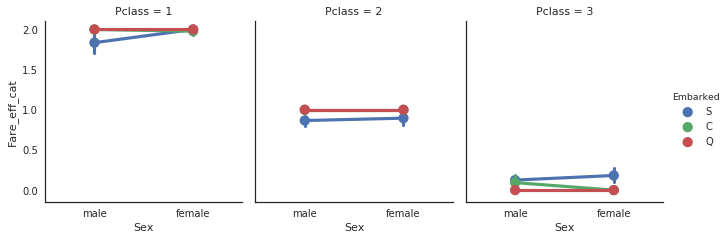

In [56]:
tab = pd.crosstab(train['Fare_eff_cat'], train['Survived'])
print(tab)
sns.barplot('Fare_eff_cat', 'Survived', data=train)
g = sns.factorplot(x="Sex", y="Fare_eff_cat", hue="Embarked", col="Pclass", data=train, aspect=0.9, size=3.5, ci=95.0)


### Modelling
**Preparing for modelling**<br>
Before we start exploring the different models we are modifying the categorical string column types to integer. This is necessary since not all classifiers can handle string input.

In [57]:
combine = pd.concat([train.drop('Survived',1), test])
survived = train['Survived']

combine["Sex"] = combine["Sex"].astype("category")
combine["Sex"].cat.categories = [0,1]
combine["Sex"] = combine["Sex"].astype("int")
combine["Embarked"] = combine["Embarked"].astype("category")
combine["Embarked"].cat.categories = [0,1,2]
combine["Embarked"] = combine["Embarked"].astype("int")
combine["Deck"] = combine["Deck"].astype("category")
combine["Deck"].cat.categories = [0,1,2,3,4,5,6,7,8]
combine["Deck"] = combine["Deck"].astype("int")

test = combine.iloc[len(train):]
train = combine.iloc[:len(train)]
train['Survived'] = survived

print(train.loc[:, ["Sex", "Embarked"]].head())

   Sex  Embarked
0    1         2
1    0         0
2    0         2
3    0         2
4    1         2


Looking at the correlation matrix between all original and derived features:

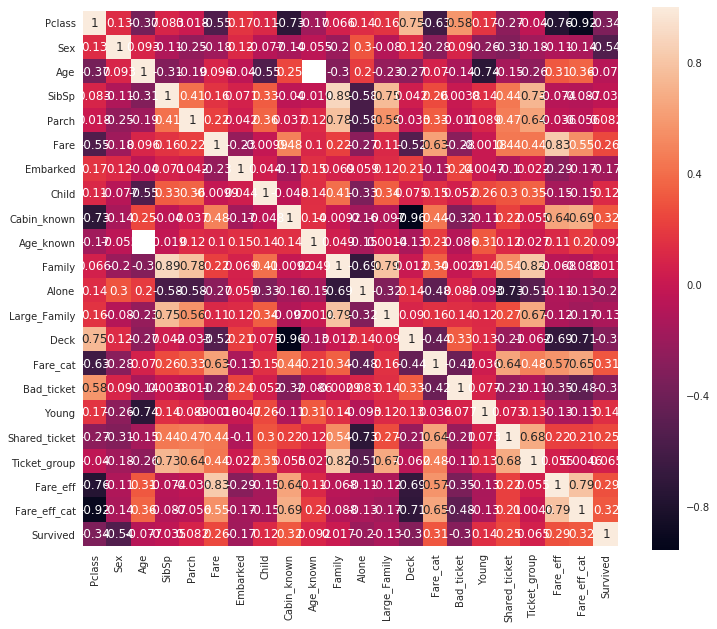

In [58]:
ax = plt.subplots(figsize=(12,10))
foo = sns.heatmap(train.drop('PassengerId', axis=1).corr(), vmax=1.0, square=True, annot=True)


In the modelling step, we will first determine which of the features carry the most signal (to be done) and then use them to train a number of different classifiers.<br>
<br>
Recap briefly what we found in our data exploration:
- sex and ticket class are the main factors
- there seem to be additional impacts from:
    - age: young men vs young women; (male) children
    - relatives: parch = 1-3, sibsp = 1-2 (somewhat explained by sex but not completely)
    - maybe the cabin deck, but not many are known
- other apparent effects appear to be strongly connected to the sex/class features:
    - port of embarkation
    - fare
    - sharing a ticket
    - large family
    - travelling alone
    - known cabin number
    - known age


Splitting the train sample into two sub-samples: training and testing. To avids overfitting.

In [59]:
training, testing = train_test_split(train, test_size=0.2, random_state=0)
print("Total sample size = %i; training sample size = %i, testing sample size = %i"\
        %(train.shape[0], training.shape[0], testing.shape[0]))


Total sample size = 891; training sample size = 712, testing sample size = 179


### Test and select the model features
Now we are ready to model. We start with a Logistic Regression to assess the importance of the individual model features. We know that by definition some of our engineered features will have a high collinearity (i.e. behave similarly) with other new or existing features. For instance, Young was designed to replace Age and Title as a combination of the two. Other correlations are visible in the heatmap above. The initial modelling will allow us to decide which features are worth to take to the next step.[Johnny: need to clarify]

In [60]:
cols = ['Sex', 'Pclass', 'Cabin_known', 'Large_Family', 'Parch', 'SibSp', 'Young', 'Alone', 'Shared_ticket', 'Child']
tcols = np.append(['Survived'], cols)

df = training.loc[:, tcols].dropna()
X = df.loc[:,cols]
y = np.ravel(df.loc[:,['Survived']])
clf_log = LogisticRegression()
clf_log = clf_log.fit(X,y)
score_log = clf_log.score(X,y)
print(score_log)


0.813202247191


In [61]:
pd.DataFrame(list(zip(X.columns, np.transpose(clf_log.coef_))), columns=['Feature', 'Importance'])

,Feature,Importance
0,Sex,[-2.42825566247]
1,Pclass,[-0.565188467226]
2,Cabin_known,[0.649105426091]
3,Large_Family,[-1.39309133368]
4,Parch,[-0.0278510518893]
5,SibSp,[-0.256674351219]
6,Young,[0.445284608284]
7,Alone,[-0.0720315870623]
8,Shared_ticket,[0.168334039806]
9,Child,[1.41589725093]


### Run and describe several different classifiers

In [62]:
cols = ['Sex', 'Pclass', 'Cabin_known', 'Large_Family', 'Shared_ticket', 'Young', 'Alone', 'Child']
tcols = np.append(['Survived'], cols)

df = training.loc[:, tcols].dropna()
X = df.loc[:, cols]
y = np.ravel(df.loc[:,['Survived']])

df_test = testing.loc[:, tcols].dropna()
X_test = df_test.loc[:, cols]
y_test = np.ravel(df_test.loc[:,['Survived']])

clf_score = {} # Record classifier's performance score


**Logistic Regression**

In [63]:
clf_log = LogisticRegression()
clf_log = clf_log.fit(X, y)
score_log = cross_val_score(clf_log, X, y, cv=5).mean()
print(score_log)
clf_score['Logistic Regression'] = score_log


0.806320599788


**Perceptron**

In [64]:
clf_pctr = Perceptron(class_weight='balanced')
clf_pctr = clf_pctr.fit(X, y)
score_pctr = cross_val_score(clf_pctr, X, y, cv=5).mean()
print(score_pctr)
clf_score['Perceptron'] = score_pctr


0.758412180168


**K Nearest Neighbours**

In [65]:
clf_knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
clf_knn = clf_knn.fit(X, y)
score_knn = cross_val_score(clf_knn, X, y, cv=5).mean()
print(score_knn)
clf_score['KNN'] = score_knn


0.804763431554


**Support Vector Machine**

In [66]:
clf_svm = svm.SVC(class_weight='balanced')
clf_svm.fit(X, y)
score_svm = cross_val_score(clf_svm, X, y, cv=5).mean()
print(score_svm)
clf_score['Support Vector Machines'] = score_svm


0.824531965886


**Bagging**

In [67]:
bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=2, weights='distance'), oob_score=True, max_samples=0.5, max_features=1.0)
clf_bag = bagging.fit(X,y)
score_bag = clf_bag.oob_score_
print(score_bag)
clf_score['Bagging KNN'] = score_bag


0.801966292135


**Decision Tree**

In [68]:
clf_tree = tree.DecisionTreeClassifier(
    #max_depth=3,\
    class_weight="balanced",\
    min_weight_fraction_leaf=0.01\
)
clf_tree = clf_tree.fit(X,y)
score_tree = cross_val_score(clf_tree, X, y, cv=5).mean()
print(score_tree)
clf_score['Decision Tree'] = score_tree


0.811904876664


**Random Forest**

In [69]:
clf_rf = RandomForestClassifier(
    n_estimators=1000,\
    max_depth=None,\
    min_samples_split=10\
    #class_weight="balanced",\
    #min_weight_fraction_leaf=0.02\
)
clf_rf = clf_rf.fit(X,y)
score_rf = cross_val_score(clf_rf, X, y, cv=5).mean()
print(score_rf)
clf_score['Random Forest'] = score_rf


0.823063720816


**Extremely Randomised Trees**

In [70]:
clf_ext = ExtraTreesClassifier(
    max_features='auto',
    bootstrap=True,
    oob_score=True,
    n_estimators=1000,
    max_depth=None,
    min_samples_split=10
    #class_weight="balanced",
    #min_weight_fraction_leaf=0.02
)
clf_ext = clf_ext.fit(X,y)
score_ext = cross_val_score(clf_ext, X, y, cv=5).mean()
print(score_ext)
clf_score['ExtraTree'] = score_ext


0.821655270112


**Gradient Boosting**

In [71]:
clf_gb = GradientBoostingClassifier(
    #loss='exponential',
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.5,
    random_state=0
)
clf_gb.fit(X,y)
score_gb = cross_val_score(clf_gb, X, y, cv=5).mean()
print(score_gb)
clf_score['Gradient Boosting'] = score_gb


0.811805685075


**Ada Boost**

In [72]:
clf_ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
clf_ada.fit(X,y)
score_ada = cross_val_score(clf_ada, X, y, cv=5).mean()
print(score_ada)
clf_score['Ada Boost'] = score_ada


0.811964391617


**eXtreme Gradient Boosting**

In [73]:
clf_xgb = xgb.XGBClassifier(
    max_depth=2,
    n_estimators=500,
    subsample=0.5,
    learning_rate=0.1
)
clf_xgb.fit(X,y)
score_xgb = cross_val_score(clf_xgb, X, y, cv=5).mean()
print(score_xgb)
clf_score['XGBoost'] = score_xgb


0.820266657725


In [74]:
pd.DataFrame(list(clf_score.items()), columns=['Model','Score']).sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,0.824532
7,Random Forest,0.823064
1,ExtraTree,0.821655
3,XGBoost,0.820267
8,Ada Boost,0.811964
4,Decision Tree,0.811905
6,Gradient Boosting,0.811806
2,Logistic Regression,0.806321
9,KNN,0.804763
5,Bagging KNN,0.801966


In [75]:
summary = pd.DataFrame(list(zip(X.columns,\
    np.transpose(clf_log.coef_),\
    np.transpose(clf_pctr.coef_),\
    ['U']*len(X.columns),\
    np.transpose(clf_svm._get_coef()),\
    ['U']*len(X.columns),\
    np.transpose(clf_tree.feature_importances_),\
    np.transpose(clf_rf.feature_importances_),\
    np.transpose(clf_ext.feature_importances_),\
    np.transpose(clf_gb.feature_importances_),\
    np.transpose(clf_ada.feature_importances_),\
    np.transpose(clf_xgb.feature_importances_)    
    )), columns=['Feature','Logistic', 'Perceptron', 'KNN', 'SVM', 'Bagging', 'Tree', 'RF', 'Extra', 'GB', 'Ada', 'Xtreme'])
summary['Median'] = summary.median(1)
summary.sort_values('Median', ascending=False)


,Feature,Logistic,Perceptron,KNN,SVM,Bagging,Tree,RF,Extra,GB,Ada,Xtreme,Median
0,Sex,[-2.43681705951],[-9.66585730139],U,[-10.7745961362],U,0.633335,0.494447,0.496595,0.171290,0.1575,0.155925,0.332869
1,Pclass,[-0.5804395292],[-2.4506245463],U,[-1.89630200051],U,0.115488,0.161677,0.153226,0.231537,0.1600,0.199584,0.160838
2,Cabin_known,[0.653892030172],[-0.0475272639282],U,[1.86651643136],U,0.067423,0.085225,0.087485,0.132796,0.0200,0.093555,0.086355
4,Shared_ticket,[0.133393561022],[-0.302986307542],U,[-0.285175474063],U,0.006158,0.046384,0.044521,0.126536,0.1075,0.114345,0.076942
3,Large_Family,[-1.95280600996],[-10.0936026767],U,[-6.51410338607],U,0.096111,0.062999,0.069213,0.056103,0.1450,0.076923,0.073068
5,Young,[0.420484407867],[2.45656545429],U,[1.50452816579],U,0.019033,0.048973,0.048536,0.124396,0.0925,0.147609,0.070736
7,Child,[1.38001713653],[7.03403506137],U,[5.9886550656],U,0.049970,0.060742,0.060470,0.068816,0.1475,0.089397,0.064779
6,Alone,[0.144439573252],[-3.80218111425],U,[-0.233576914511],U,0.012482,0.039553,0.039953,0.088526,0.1700,0.122661,0.064240


The overall result is not very surprising: **Sex and Pclass are the dominant features while everything else is of similar, significantly lower importance**.<br>
<br>
### Ensemble methods
Each of the individual classifiers we have used above has its strengths and weaknesses, and we should always choose the classifier that's best equipped to handle a certain problem and/or has been found to perform with the highest accuracy. But wouldn't it be nice to combine all these different classifiers to get a more accurate overall prediction? This is possible through an approach called **Ensemble methods**.<br>
<br>
In order to combine the results of different kinds of classifiers to improve our prediction. The easiest method to combine different classifiers is through a **Voting Classifier**.<br>
It does exactly what the name suggests: each individual classifier makes a certain prediction and then the majority vote is used for each row. This majority process can either give all individual votes the same importance or assign different weights to make some classifiers have more impact than others.<br>
Read more in the extensive [Kaggle Ensemble Guide](https://mlwave.com/kaggle-ensembling-guide/).

In [76]:
clf_vote = VotingClassifier(
    estimators=[
        #('tree', clf_tree)
        ('knn', clf_knn),
        ('svm', clf_svm),
        ('extra', clf_ext),
        #('gb', clf_gb),
        ('xgb', clf_xgb),
        ('percep', clf_pctr),
        ('logistic', clf_log),
        #('RF', clf_rf)
    ],
    weights=[2,2,3,3,1,2],
    voting='hard'
)
clf_vote.fit(X,y)

scores = cross_val_score(clf_vote, X, y, cv=5, scoring='accuracy')
print("Voting: Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


Voting: Accuracy: 0.82 (+/- 0.02)


[TODO] Here I do not use any stack method to improve prediction. There is a material we should have a look at [Anisotropic's Kernel](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python).<br>
<br>
<br>
### Preparing the prediction for submission

In [77]:
clf = clf_vote
df2 = test.loc[:,cols].fillna(method='pad')
surv_pred = clf.predict(df2)
submit = pd.DataFrame({'PassengerId' : test.loc[:, 'PassengerId'],
                       'Survived' : surv_pred.T})
submit.to_csv("./dataset/submit.csv", index=False)
print(submit.head())
print(submit.shape)

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
(418, 2)


Finally, I submitted and got the rank of 1327. It is top 20%.:(1327 / 7026 = 18.89%)<br>
![](https://raw.githubusercontent.com/johnny610926/ai_warmup_meetup/master/session01/data_analytics/kaggle_titanic/kaggle_Titanic_submission_20170716.png) 